# Praktikum 2



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sci
import Lab2Functions as ekg



## Aufgabe 3 


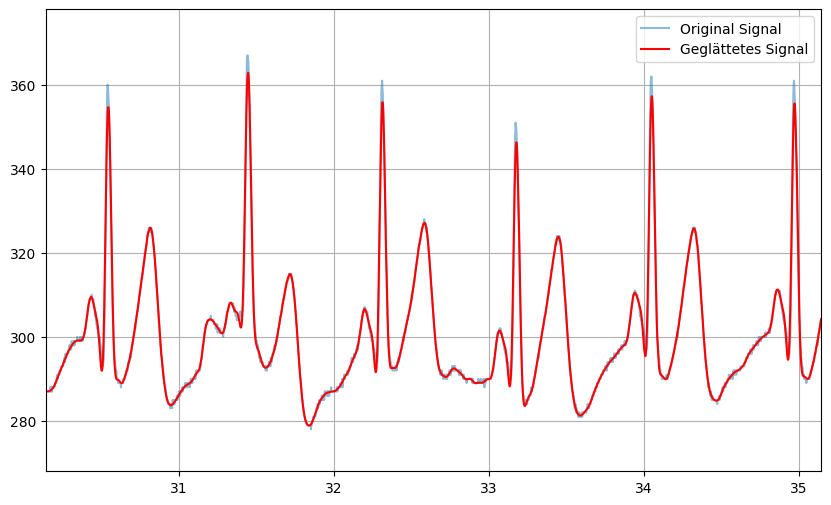

In [2]:
# Plot Ruhe Andreas
df1 = pd.read_csv('lab2code1_Ruhe_Andreas2.csv', sep = ';')
time_ms = df1['Millis']
ecg=df1['Value']

#Zeit in Sekunden und Minuten
time_sec = time_ms / 1000 
time_minutes = time_sec / 60

#Signal glätten
Wn=0.08
b, a = sci.butter(4, Wn, 'low', analog=False)
ecg_filtered = sci.filtfilt(b, a, ecg) 

# EKG plotten 
plt.figure(figsize=(10, 6))
plt.plot(time_sec, ecg, label='Original Signal', alpha=0.5)
plt.plot(time_sec, ecg_filtered, label='Geglättetes Signal', color='red')
#plt.title('EKG Signal Signal Andreas - Geglättet und Original')
plt.legend()
plt.grid()

# nur 5 Sekunden vom Plot anzeigen
start_time = time_sec.iloc[0]
end_time = start_time + 5  

plt.xlim(start_time, end_time)
plt.show()



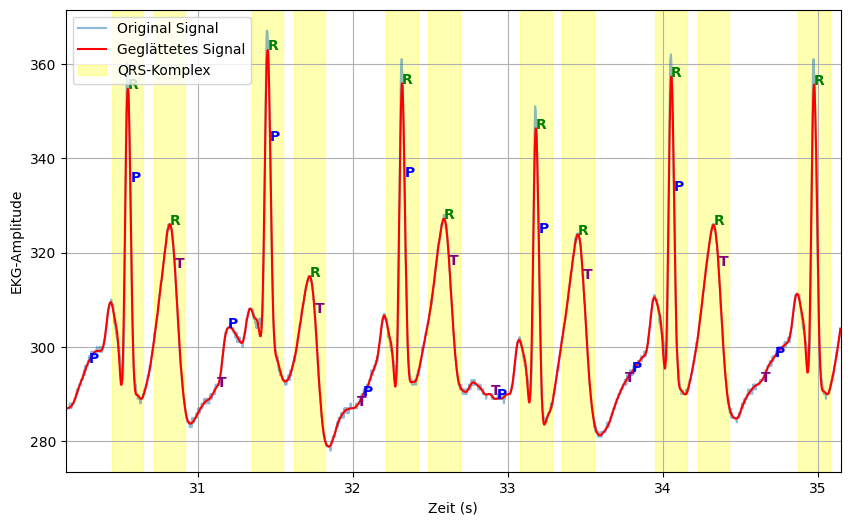

In [3]:
# Plot mit markierten P-, R- und T-Wellen mit QRS-Komplex
time_sec= time_ms / 1000
# Nur Daten für 5 Sekunden plotten
start_time = time_sec.iloc[0]
end_time = start_time + 5  
mask = (time_sec >= start_time) & (time_sec <= end_time)

# Gefilterte Daten beschränken
time_sec_plot = time_sec[mask]
ecg_filtered_plot = ecg_filtered[mask]
ecg_plot = ecg[mask]

# R-Spitzen erkennen (z. B. für QRS-Komplex)
distance = int(200 / (time_ms[1] - time_ms[0]))  # Mindestabstand (200ms in Samples)
r_peaks, _ = sci.find_peaks(ecg_filtered, distance=distance, height=np.mean(ecg_filtered) + np.std(ecg_filtered))

# QRS-Komplex: Q- und S-Punkte finden
qrs_windows = []
for peak in r_peaks:
    if start_time <= time_sec[peak] <= end_time:  # Nur Spitzen innerhalb des Plots
        window = int(100 / (time_ms[1] - time_ms[0]))  # 100ms vor und nach der R-Spitze
        q_idx = max(0, peak - window)
        s_idx = min(len(ecg_filtered) - 1, peak + window)
        qrs_windows.append((q_idx, s_idx))

# P- und T-Wellen schätzen
p_waves = [max(0, q - int(150 / (time_ms[1] - time_ms[0]))) for q, _ in qrs_windows]
t_waves = [min(len(ecg_filtered) - 1, s + int(200 / (time_ms[1] - time_ms[0]))) for _, s in qrs_windows]

# Plotten der EKG-Daten mit verbesserten Markierungen
plt.figure(figsize=(10, 6))
plt.plot(time_sec_plot, ecg_plot, label='Original Signal', alpha=0.5)
plt.plot(time_sec_plot, ecg_filtered_plot, label='Geglättetes Signal', color='red')

# QRS-Komplex als Rechtecke markieren
for q, s in qrs_windows:
    if start_time <= time_sec[q] <= end_time and start_time <= time_sec[s] <= end_time:
        plt.axvspan(time_sec[q], time_sec[s], color='yellow', alpha=0.3, label='QRS-Komplex')

# R-Spitzen als Buchstaben markieren
for r in r_peaks:
    if start_time <= time_sec[r] <= end_time:
        plt.text(time_sec[r], ecg_filtered[r], 'R', color='green', fontsize=10, fontweight='bold')

# P- und T-Wellen als Buchstaben markieren
for p in p_waves:
    if start_time <= time_sec[p] <= end_time:
        plt.text(time_sec[p], ecg_filtered[p], 'P', color='blue', fontsize=10, fontweight='bold')
for t in t_waves:
    if start_time <= time_sec[t] <= end_time:
        plt.text(time_sec[t], ecg_filtered[t], 'T', color='purple', fontsize=10, fontweight='bold')

# Legende anpassen (verhindert doppelte Labels)
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())

#plt.title('EKG Signal Andreas - P-, R- und T-Wellen mit QRS-Komplex')
plt.xlabel('Zeit (s)')
plt.ylabel('EKG-Amplitude')
plt.grid()
plt.xlim(start_time, end_time)
plt.show()

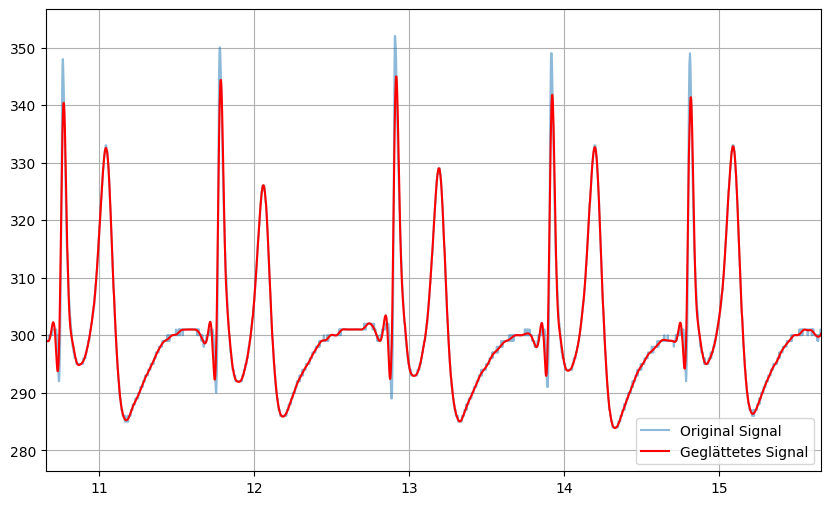

In [4]:
# Plot Ruhe Pauline
df2 = pd.read_csv('lab2code1_Ruhe_Pauline.csv', sep = ';')
time_ms = df2['Millis']
ecg=df2['Value']

#Zeit in Sekunden und Minuten
time_sec = time_ms / 1000 
time_minutes = time_sec / 60

#Signal glätten
Wn=0.08
b, a = sci.butter(4, Wn, 'low', analog=False)
ecg_filtered = sci.filtfilt(b, a, ecg) 

# EKG plotten 
plt.figure(figsize=(10, 6))
plt.plot(time_sec, ecg, label='Original Signal', alpha=0.5)
plt.plot(time_sec, ecg_filtered, label='Geglättetes Signal', color='red')
#plt.title('EKG Signal Signal Pauline - Geglättet und Original')
plt.legend()
plt.grid()

# nur 5 Sekunden vom Plot anzeigen
start_time = time_sec.iloc[0]
end_time = start_time + 5  

plt.xlim(start_time, end_time)
plt.show()



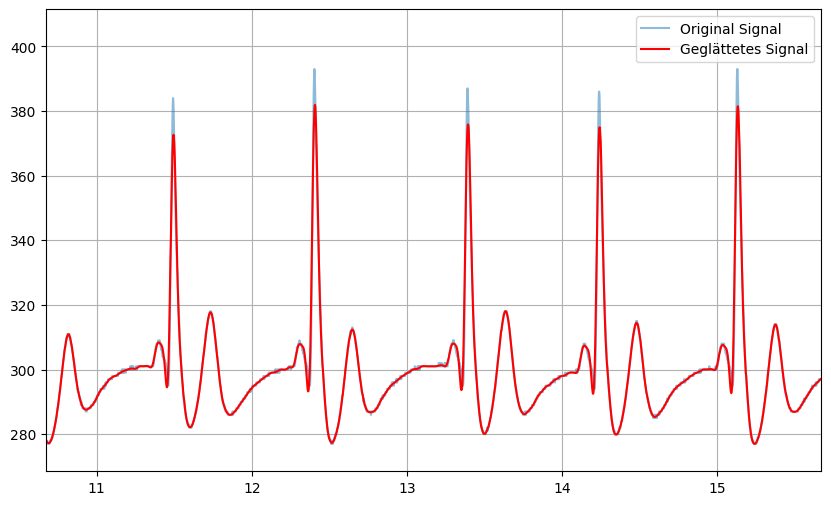

In [5]:
# Plot Ruhe Carina
df3 = pd.read_csv('lab2code1_Ruhe_Carina.csv', sep = ';')
time_ms = df3['Millis']
ecg=df3['Value']

#Zeit in Sekunden und Minuten
time_sec = time_ms / 1000 
time_minutes = time_sec / 60

#Signal glätten
Wn=0.08
b, a = sci.butter(4, Wn, 'low', analog=False)
ecg_filtered = sci.filtfilt(b, a, ecg) 

# EKG plotten 
plt.figure(figsize=(10, 6))
plt.plot(time_sec, ecg, label='Original Signal', alpha=0.5)
plt.plot(time_sec, ecg_filtered, label='Geglättetes Signal', color='red')
#plt.title('EKG Signal Signal Carina - Geglättet und Original')
plt.legend()
plt.grid()

# nur 5 Sekunden vom Plot anzeigen
start_time = time_sec.iloc[0]
end_time = start_time + 5  

plt.xlim(start_time, end_time)
plt.show()



## Aufgabe 5


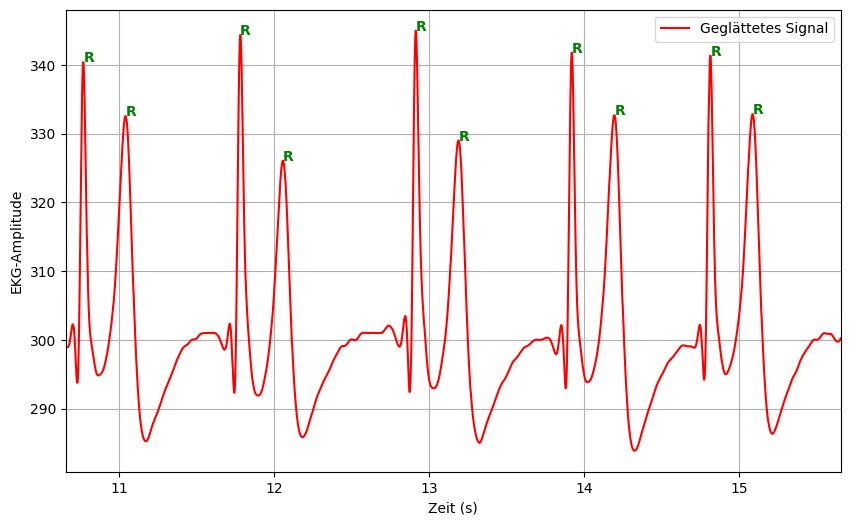

In [6]:
# Plot Ruhe Pauline
df2 = pd.read_csv('lab2code1_Ruhe_Pauline.csv', sep = ';')
time_ms = df2['Millis']
ecg=df2['Value']

#Zeit in Sekunden und Minuten
time_sec = time_ms / 1000 
time_minutes = time_sec / 60

#Signal glätten
Wn=0.08
b, a = sci.butter(4, Wn, 'low', analog=False)
ecg_filtered = sci.filtfilt(b, a, ecg)

time_sec= time_ms / 1000
# Nur Daten für 5 Sekunden plotten
start_time = time_sec.iloc[0]
end_time = start_time + 5  
mask = (time_sec >= start_time) & (time_sec <= end_time)

# Gefilterte Daten beschränken
time_sec_plot = time_sec[mask]
ecg_filtered_plot = ecg_filtered[mask]
ecg_plot = ecg[mask]

# R-Spitzen erkennen (z. B. für QRS-Komplex)
distance = int(200 / (time_ms[1] - time_ms[0]))  # Mindestabstand (200ms in Samples)
r_peaks, _ = sci.find_peaks(ecg_filtered, distance=distance, height=np.mean(ecg_filtered) + np.std(ecg_filtered))


# Plotten der EKG-Daten mit verbesserten Markierungen
plt.figure(figsize=(10, 6))
#plt.plot(time_sec_plot, ecg_plot, label='Original Signal', alpha=0.5)
plt.plot(time_sec_plot, ecg_filtered_plot, label='Geglättetes Signal', color='red')


# R-Spitzen als Buchstaben markieren
for r in r_peaks:
    if start_time <= time_sec[r] <= end_time:
        plt.text(time_sec[r], ecg_filtered[r], 'R', color='green', fontsize=10, fontweight='bold')


# Legende anpassen 
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())

#plt.title('EKG Signal Pauline - R-Wellen')
plt.xlabel('Zeit (s)')
plt.ylabel('EKG-Amplitude')
plt.grid()
plt.xlim(start_time, end_time)
plt.show()

## Aufgabe 6


In [7]:
def analyze_ecg(file_path, person_name):
    # CSV-Datei einlesen
    df = pd.read_csv(file_path, sep=';')
    time_ms = df['Millis']
    ecg = df['Value']

    # Signal glätten
    Wn = 0.08
    b, a = sci.butter(4, Wn, 'low', analog=False)
    ecg_filtered = sci.filtfilt(b, a, ecg)

    # R-Zacken erkennen
    peaks, _ = sci.find_peaks(ecg_filtered, distance=250)  

    # RR-Intervalle berechnen (in Millisekunden)
    rr_intervals = np.diff(time_ms[peaks])  

    # Mittlere Herzfrequenz berechnen (in bpm)
    average_hr = 60000 / np.mean(rr_intervals)  

    # HRV berechnen (Standardabweichung der RR-Intervalle)
    hrv = np.std(rr_intervals) 

    print(f"\nAnalyse für {person_name}:")
    print(f"Mittlere Herzfrequenz: {average_hr:.2f} bpm")
    print(f"HRV (Standardabweichung der RR-Intervalle): {hrv:.2f} ms")


# Analyse für Carina
analyze_ecg('lab2code1_Ruhe_Carina.csv', 'Carina')

# Analyse für Pauline
analyze_ecg('lab2code1_Ruhe_Pauline.csv', 'Pauline')

# Analyse für Andreas
analyze_ecg('lab2code1_Ruhe_Andreas2.csv', 'Andreas')



Analyse für Carina:
Mittlere Herzfrequenz: 63.64 bpm
HRV (Standardabweichung der RR-Intervalle): 88.55 ms

Analyse für Pauline:
Mittlere Herzfrequenz: 62.04 bpm
HRV (Standardabweichung der RR-Intervalle): 88.96 ms

Analyse für Andreas:
Mittlere Herzfrequenz: 60.19 bpm
HRV (Standardabweichung der RR-Intervalle): 70.31 ms


## Aufgabe 7

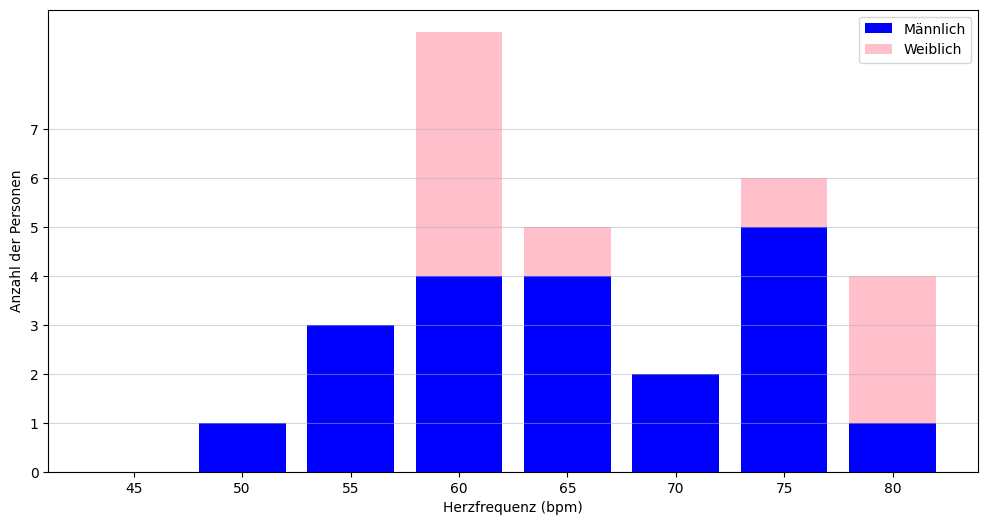

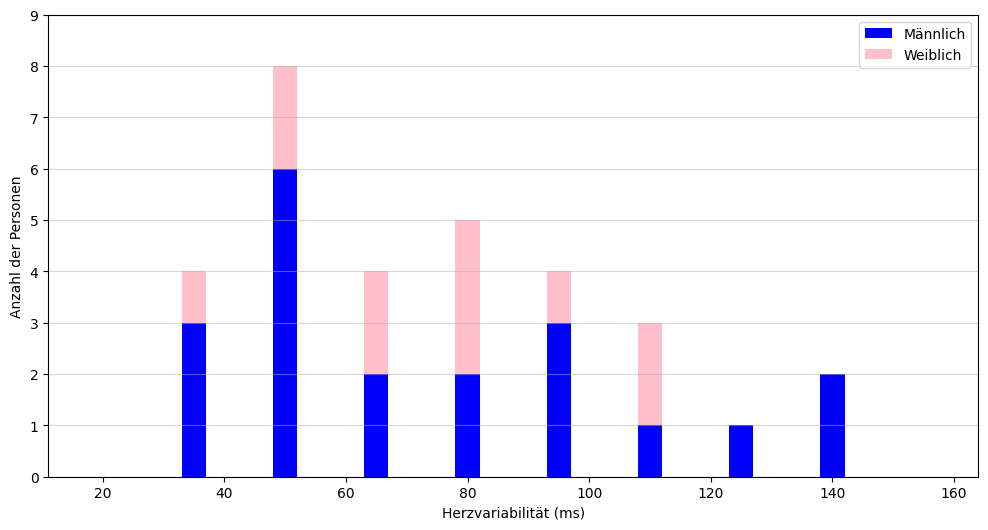

In [8]:
hf_männlich =[69, 75, 71, 64, 63, 51, 66, 56, 78, 69, 56, 60, 87, 77, 85, 62, 76, 68, 59, 77, 72]
hf_weiblich =[66, 75, 63, 102, 82, 62, 64, 82, 87, 82, 64, 63] 
hrv_männlich=[62, 46, 81, 100, 152, 154, 103, 179, 50, 45, 56, 70, 54, 85, 112, 136, 46, 77, 63, 103, 64]
hrv_weiblich=[55, 41, 124, 52, 68, 89, 89, 67, 212, 104, 90, 116]



# Histogramm für Herzfrequenzen erstellen
plt.figure(figsize=(12, 6))
bins = np.arange(45, 90, 5)
plt.grid(axis='y', alpha=0.5)
# Histogramm für männliche Herzfrequenzen
hist_männlich, _ = np.histogram(hf_männlich, bins=bins)
plt.bar(bins[:-1], hist_männlich, width=4, alpha=1, color='blue', label='Männlich')
# Histogramm für weibliche Herzfrequenzen
hist_weiblich, _ = np.histogram(hf_weiblich, bins=bins)
plt.bar(bins[:-1], hist_weiblich, width=4, alpha=1, color='pink', label='Weiblich', bottom=hist_männlich)
plt.xlabel('Herzfrequenz (bpm)')
plt.ylabel('Anzahl der Personen')
#plt.title('Verteilung der Herzfrequenzen bei Männern und Frauen (Gruppe A2)')
plt.yticks(np.arange(0, 8, 1))
plt.grid(axis='y', alpha=0.5)
plt.legend()
plt.show()

# Histogramm für Herzfrequenzvariabilität erstellen
plt.figure(figsize=(12, 6))
bins = np.arange(20, 180, 15)
# Histogramm für männliche Herzfrequenzen
hist_männlich, _ = np.histogram(hrv_männlich, bins=bins)
plt.bar(bins[:-1], hist_männlich, width=4, alpha=1, color='blue', label='Männlich')
# Histogramm für weibliche Herzfrequenzen
hist_weiblich, _ = np.histogram(hrv_weiblich, bins=bins)
plt.bar(bins[:-1], hist_weiblich, width=4, alpha=1, color='pink', label='Weiblich', bottom=hist_männlich)
plt.xlabel('Herzvariabilität (ms)')
plt.ylabel('Anzahl der Personen')
#plt.title('Verteilung der Herzvariabilität bei Männern und Frauen (Gruppe A2)')
plt.yticks(np.arange(0, 10, 1))
plt.grid(axis='y', alpha=0.5)
plt.legend()
plt.show()

## Aufgabe 8

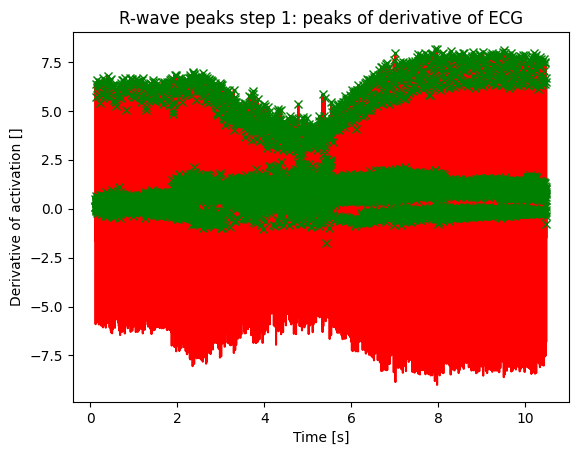

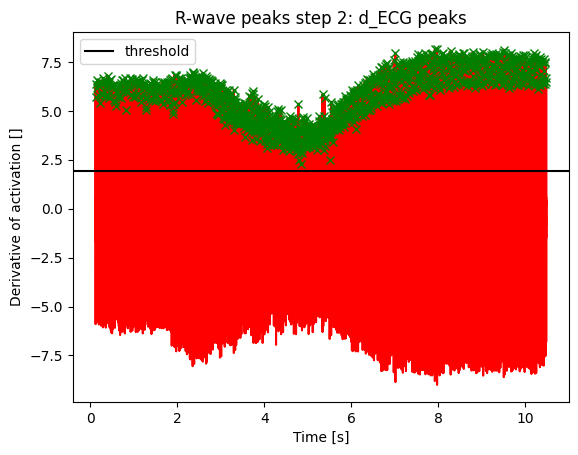

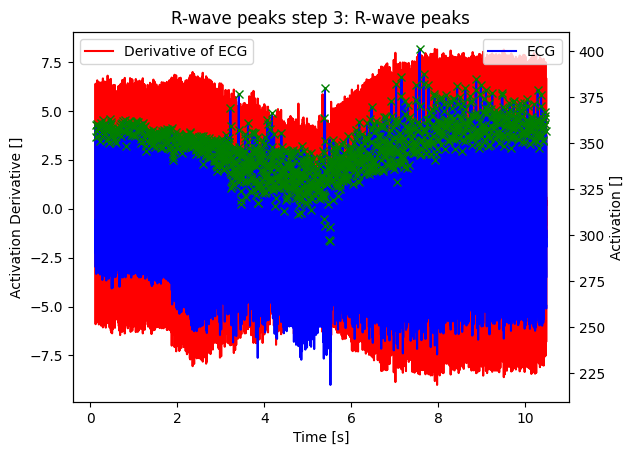

<function matplotlib.pyplot.show(close=None, block=None)>

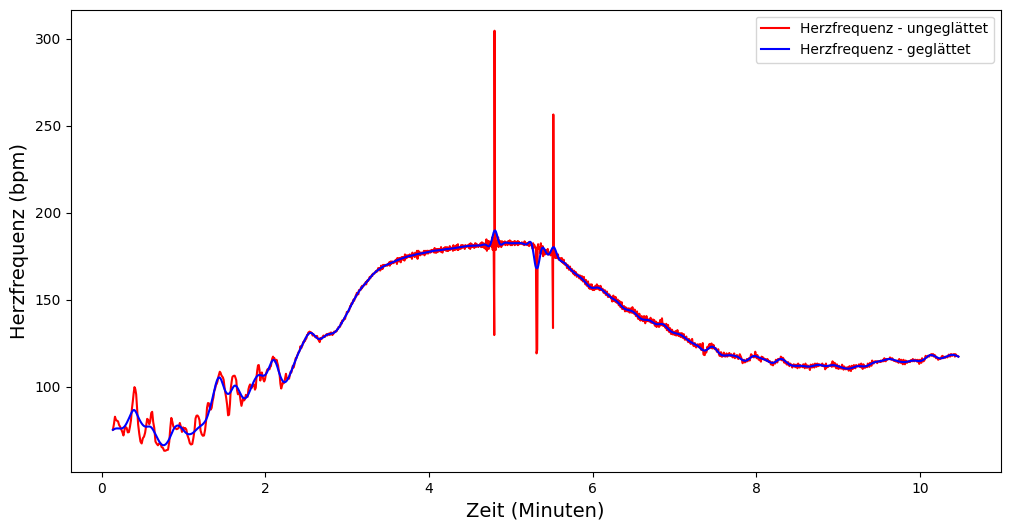

In [9]:
from Lab2Functions import Rwave_peaks


df4 = pd.read_csv('lab2code1_Fahrrad_Andreas.csv', sep=';')
time_ms = df4['Millis']  
ecg = df4['Value'] 

#Zeit umrechnen
time_sec = time_ms / 1000 
time_minutes = time_sec/60 

#Signal glätten
Wn=0.09
b,a =sci.butter(4, Wn, 'low', analog=False)
ecg_filtered = sci.filtfilt(b, a, ecg)


#peaks finden
d_ecg, peaks_d_ecg = ekg.decg_peaks(ecg_filtered, time_minutes)
Rwave_peaks_d_ecg=ekg.d_ecg_peaks(d_ecg, peaks_d_ecg, time_minutes, 0.4, 0.5)
Rwave_t=Rwave_peaks(ecg_filtered, d_ecg, Rwave_peaks_d_ecg, time_minutes)

Rwave_intervals = np.diff(Rwave_t)
heart_rate = (1 / Rwave_intervals)

#heart rate nochmal filtern
Wn=0.1
b2, a2 =sci.butter(4, Wn, btype='low')
heart_rate_filt=sci.filtfilt(b2, a2, heart_rate)
heart_rate_time=Rwave_t[1:]

#plot heart rate
plt.figure(figsize=(12, 6))
plt.plot(heart_rate_time, heart_rate, label='Herzfrequenz - ungeglättet', color='r') 
plt.plot(heart_rate_time, heart_rate_filt, label='Herzfrequenz - geglättet', color='blue')
plt.legend()
#plt.title('Herzfrequenz über die Zeit') 
plt.xlabel('Zeit (Minuten)', fontsize=14)
plt.ylabel('Herzfrequenz (bpm)', fontsize=14)
plt.show



### Aufgabe 9

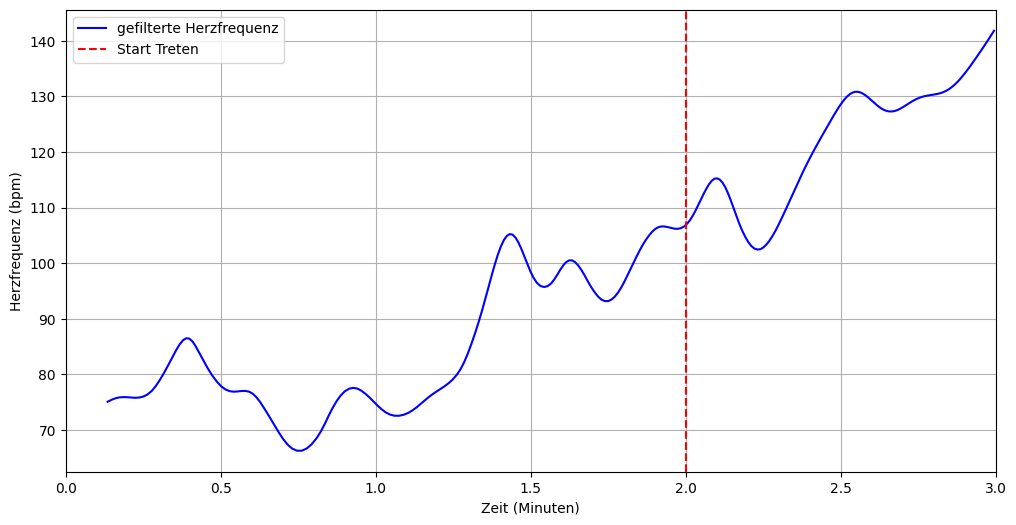

In [10]:
# Daten auf die ersten 3 Minuten begrenzen
max_time = 3  
mask = heart_rate_time <= max_time
heart_rate_time_limited = heart_rate_time[mask]
heart_rate_filt_limited = heart_rate_filt[mask]

# Herzfrequenz nur für die ersten 3 Minuten
plt.figure(figsize=(12, 6))
plt.plot(heart_rate_time_limited, heart_rate_filt_limited, label='gefilterte Herzfrequenz', color='b')

# Markierung bei 2 Minuten
plt.axvline(x=2, color='r', linestyle='--', label='Start Treten')

#Plot
#plt.title('Herzfrequenz während der ersten drei Minuten')
plt.xlabel('Zeit (Minuten)')
plt.ylabel('Herzfrequenz (bpm)')
plt.legend()
plt.grid()
plt.xlim([0, max_time])  
plt.show()


# Aufgabe 10

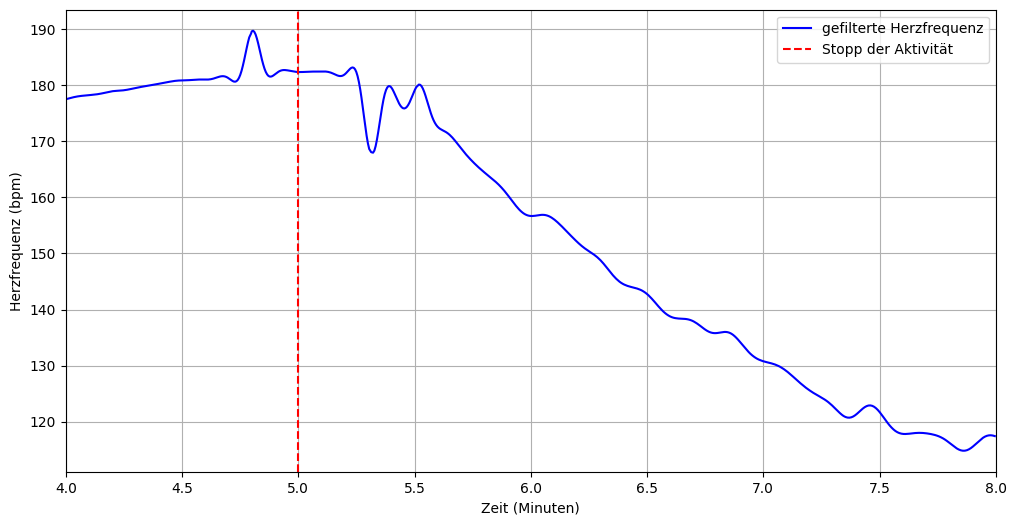

In [11]:
start_time = 4  # Startzeit in Minuten
end_time = 8  # Endzeit in Minuten
mask = (heart_rate_time >= start_time) & (heart_rate_time <= end_time)
heart_rate_time_segment = heart_rate_time[mask]
heart_rate_filt_segment = heart_rate_filt[mask]

# Plot der Herzfrequenz (4 bis 8 Minuten)
plt.figure(figsize=(12, 6))
plt.plot(heart_rate_time_segment, heart_rate_filt_segment, label='gefilterte Herzfrequenz', color='b')

# Markierung bei Minute 5
plt.axvline(x=5, color='r', linestyle='--', label='Stopp der Aktivität')

#plt.title('Herzfrequenz vor und nach Stopp der Aktivität')
plt.xlabel('Zeit (Minuten)')
plt.ylabel('Herzfrequenz (bpm)')
plt.legend()
plt.grid()
plt.xlim([start_time, end_time])  # Begrenzung auf 4 bis 8 Minuten
plt.show()

In [12]:
# Ab der fünften Minute die Herzfrequenz extrahieren
time_threshold = 5  
after_five_minutes = heart_rate_time >= time_threshold
heart_rate_after_five = heart_rate_filt[after_five_minutes]
time_after_five = heart_rate_time[after_five_minutes]

# Niedrigste Herzfrequenz finden
min_heart_rate = np.min(heart_rate_after_five)
min_heart_rate_time = time_after_five.iloc[np.argmin(heart_rate_after_five)]

# Ausgabe der niedrigsten Herzfrequenz
print(f"Niedrigste Herzfrequenz, die nach Stopp der Aktivität erreicht wird: {min_heart_rate:.2f} bpm")
print(f"Zeit ab dem Stopp bis zum Erreichen der niedrigsten Herzfrequenz: {min_heart_rate_time - time_threshold:.2f} Minuten")

Niedrigste Herzfrequenz, die nach Stopp der Aktivität erreicht wird: 110.26 bpm
Zeit ab dem Stopp bis zum Erreichen der niedrigsten Herzfrequenz: 4.12 Minuten


## Aufgabe 12, 13


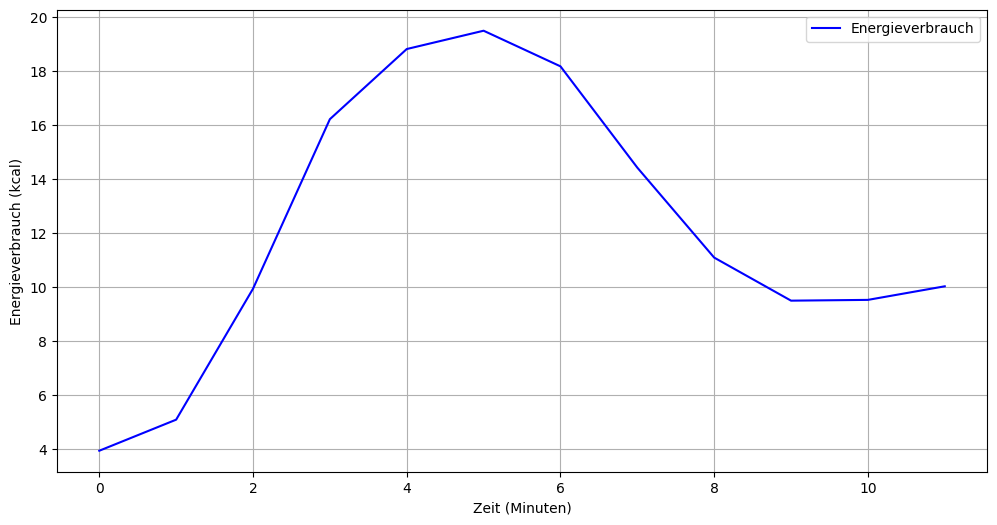

Gesamter Energieverbrauch während der Aktivität: 142.28 kcal
Grundumsatz: 1753.90 kcal


In [13]:
# gesamte Herzfrequenz
heartrate_ges = []
for i in range(0,len(heart_rate_filt),131):
    hr_min = np.mean(heart_rate_filt[i:(i+131)])
    heartrate_ges.append(float(hr_min))

#print(heartrate_ges)

# Variablen definieren
energy_ges = [3.94,]
weight=67
body_height=188
resting_hr = 60.19
age = 25
hr_max = 206-(age*0.88)

# Energieverbrauch berechnen
for hr_avg in heartrate_ges:
    HRR = 100*(hr_avg-resting_hr)/(hr_max-age-resting_hr)
    energieverbrauch = (1.004+0.0250*HRR+0.01088*weight+0.00177*weight*HRR)
    energy_ges.append(energieverbrauch)
zeit = list(range(0,len(energy_ges)))

#Energieverbrauch über die Zeit plotten
plt.figure(figsize=(12, 6))
plt.plot(zeit, energy_ges, label='Energieverbrauch', color='b')
plt.legend()
#plt.title('metabolischer Energieverbrauch über die Zeit')
plt.grid()
plt.xlabel('Zeit (Minuten)') 
plt.ylabel('Energieverbrauch (kcal)') 
plt.show()

# gesamter Energieverbrauch
total_energy = np.sum(energy_ges[1:])  
print(f"Gesamter Energieverbrauch während der Aktivität: {total_energy:.2f} kcal")

# Grundumsatz Andreas (Harris Benedict Formel)
Grundumsatz = 66+(13.7*weight)+(5*body_height)-(6.8*age)
print(f"Grundumsatz: {Grundumsatz:.2f} kcal")


In [14]:
# Umrechnung in Andere Einheiten Gegebene Werte
energieverbrauch_kcal = 142.28  # Energieverbrauch in kcal
kcal_to_kj = 4.184  # Umrechnungsfaktor von kcal zu kJ
energie_tafel_kcal = 547  # Energie einer Rittersport-Tafel in kcal
energie_stueck_kcal = 33  # Energie eines Rittersport-Stücks (6g) in kcal
energie_bier_kcal = 210  # Energie eines 0,5-Liter-Biers in kcal

# Berechnungen
# In Kilojoule (kJ)
energieverbrauch_kj = energieverbrauch_kcal * kcal_to_kj

# In Rittersport-Tafeln (100 g)
anzahl_tafeln = energieverbrauch_kcal / energie_tafel_kcal

# In Rittersport-Stücken (6 g)
anzahl_stuecke = energieverbrauch_kcal / energie_stueck_kcal

# In Bier (0.5 Liter)
anzahl_biere = energieverbrauch_kcal / energie_bier_kcal

# Ergebnisse ausgeben
print("Energieverbrauch: ", energieverbrauch_kcal)
print("Energieverbrauch in Kilojoule: ", round(energieverbrauch_kj,2))
print("Energieverbrauch in Rittersport-Tafeln (100 g): ", round(anzahl_tafeln, 2))	
print("Energieverbrauch in Rittersport-Stücken (6 g): ", round(anzahl_stuecke,2))
print("Energieverbrauch in Bier (0.5 Liter): ", round(anzahl_biere,2))
print("Täglicher Energieverbrauch in kcal: ", Grundumsatz)

Energieverbrauch:  142.28
Energieverbrauch in Kilojoule:  595.3
Energieverbrauch in Rittersport-Tafeln (100 g):  0.26
Energieverbrauch in Rittersport-Stücken (6 g):  4.31
Energieverbrauch in Bier (0.5 Liter):  0.68
Täglicher Energieverbrauch in kcal:  1753.9
